In [21]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
IMAGE_SIZE = [224, 224]

In [23]:
train_path = '../hand/train images/'
valid_path = '../hand/test images/'

In [24]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 24s 0us/step


In [25]:
for layer in vgg.layers:
  layer.trainable = False

In [30]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [32]:
batch_size = 1

train_image_gen = image_gen.flow_from_directory('../hand/train images',
                                               target_size=IMAGE_SIZE[:2],
                                               batch_size=batch_size,
                                                class_mode='sparse'
                                               )

Found 601 images belonging to 6 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory('../hand/test images',
                                               target_size=IMAGE_SIZE[:2],
                                               batch_size=batch_size,
                                               class_mode='sparse'
                                               )

Found 186 images belonging to 6 classes.


In [35]:
x = Flatten()(vgg.output)

In [38]:
classes = test_image_gen.class_indices

In [40]:
len(classes)

6

In [41]:
classes_train = train_image_gen.class_indices

In [43]:
len(classes_train)

6

In [44]:
prediction = Dense(len(classes), activation='softmax')(x)

In [45]:
model = Model(inputs=vgg.input, outputs=prediction)

In [46]:
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [51]:
model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [52]:
r=model.fit_generator(train_image_gen,epochs=10,validation_data= test_image_gen)
                        
                       

Epoch 1/10
601/601 [==============================] - 139s 231ms/step - loss: 1.6483 - accuracy: 0.6123 - val_loss: 1.6298 - val_accuracy: 0.6613 loss: 1.6537 - accuracy: 
Epoch 2/10
601/601 [==============================] - 154s 256ms/step - loss: 0.7191 - accuracy: 0.8303 - val_loss: 1.0014 - val_accuracy: 0.7688
Epoch 3/10
601/601 [==============================] - 157s 261ms/step - loss: 0.6598 - accuracy: 0.8619 - val_loss: 0.2723 - val_accuracy: 0.9301
Epoch 4/10
601/601 [==============================] - 156s 260ms/step - loss: 0.4117 - accuracy: 0.9085 - val_loss: 0.1471 - val_accuracy: 0.9677
Epoch 5/10
601/601 [==============================] - 157s 261ms/step - loss: 0.4025 - accuracy: 0.8968 - val_loss: 0.3638 - val_accuracy: 0.9247
Epoch 6/10
601/601 [==============================] - 156s 259ms/step - loss: 0.3057 - accuracy: 0.9418 - val_loss: 0.2324 - val_accuracy: 0.9355
Epoch 7/10
601/601 [==============================] - 157s 261ms/step - loss: 0.3590 - accuracy: 0

In [74]:
model.save("VGG16_finger.h5")

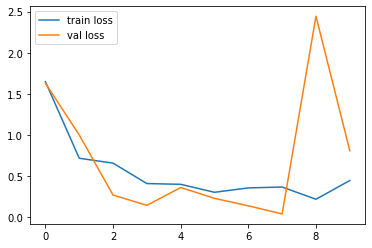

In [56]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

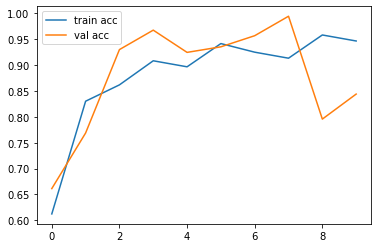

In [58]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [128]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/0.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

0

In [129]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/1.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

1

In [130]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/2.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

2

In [131]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/3.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

3

In [132]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/4.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

4

In [174]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img("../hand/5.png",target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)

result.argmax()

4

In [177]:
test_image = image.img_to_array(test_image)

In [178]:
test_image.shape

(224, 224, 3)

In [187]:
image = cv2.imread('../hand/five_google.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (224,224)) 

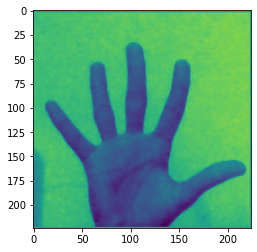

In [188]:
plt.imshow(image)

In [189]:
cv2.imwrite('../hand/five_google_trans.png',image)

True

In [156]:
type(image)

numpy.ndarray

In [170]:
test_image = np.expand_dims(image,axis=0)

In [171]:
test_image.shape

(1, 224, 224)

In [159]:
result = model.predict(test_image)

ValueError: in user code:

    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    E:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    E:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    E:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 224, 224]


In [150]:
from sklearn.metrics import classification_report

In [151]:
predictions = model.predict(test_image_gen)

In [155]:
#predictions

Resnet

In [89]:
from keras.applications.resnet50 import ResNet50

In [90]:
resnet50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 133s 1us/step


In [91]:
x = Flatten()(resnet50.output)

In [92]:
classes = test_image_gen.class_indices

In [94]:
len(classes)

6

In [95]:
prediction = Dense(len(classes), activation='softmax')(x)

In [97]:
resnet50_model = Model(inputs=resnet50.input, outputs=prediction)

In [98]:
resnet50_model.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [100]:
resnet50_model.compile(
  loss='SparseCategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [102]:
resnet50_result=resnet50_model.fit_generator(train_image_gen,epochs=8,validation_data= test_image_gen)

Epoch 1/8
601/601 [==============================] - 418s 696ms/step - loss: 5.7701 - accuracy: 0.1880 - val_loss: 1.8541 - val_accuracy: 0.1452
Epoch 2/8
601/601 [==============================] - 512s 852ms/step - loss: 2.2094 - accuracy: 0.1830 - val_loss: 10.2247 - val_accuracy: 0.1774
Epoch 3/8
214/601 [=========>....................] - ETA: 4:58 - loss: 2.1346 - accuracy: 0.2850

KeyboardInterrupt: 